# Library imports

In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pandas as pd
import seaborn as sns

# Load data

In [22]:
# read csv file
df = pd.read_csv('HW1_stockdata.csv', index_col = 'Date')

# show first five rows
df.head()
df.shape

(1013, 39)

In [24]:
# get number of rows and columns of the dataset
df_shape = df.shape

print(f"There are {df_shape[0]} rows and {df_shape[1]} columns in the dataset")

There are 1013 rows and 39 columns in the dataset


We can see that the csv file of asset prices contains 39 different assets and 1013 records for each asset. The time-series is in reverse order (newest to oldest) and there are no missing datapoints in the dataset. 

# Calculate asset price correlations

Before calculating the correlation matrix, it is important to first normalise the dataset and convert the absolute asset prices into daily returns. In financial time-series it is common to make this transformation as investors are typically interested in returns on assets rather than their absolute prices. By normalising the data it allows us to compare the expected returns of two assets more easily. 

In [25]:
# create empty dataframe for log returns information
log_returns_df = pd.DataFrame()

# calculate log returns of each asset
# loop through each column in dataframe and calculate the daily log returns
for col in df.columns:
    log_returns_df[col] = np.log(df[col]).diff(-1)

# check output of log returns dataframe
log_returns_df.head()

,EOD~BND.11,EOD~DBC.11,EOD~DIA.11,EOD~EEM.11,EOD~EFA.11,EOD~EMB.11,EOD~EPP.11,EOD~EWG.11,EOD~EWI.11,EOD~EWJ.11,...,EOD~VGK.11,EOD~VPL.11,EOD~VXX.11,EOD~XLB.11,EOD~XLE.11,EOD~XLF.11,EOD~XLK.11,EOD~XLU.11,EOD~CSJ.11,EOD~FXF.11
Date,,,,,,,,,,,,,,,,,,,,,
08/11/2017,-0.000733,-0.001828,0.000170,0.004714,0.003297,-0.000436,0.009904,0.003321,-0.004513,0.006184,...,0.000516,0.007864,0.000298,0.001023,-0.004858,-0.004940,0.005483,0.000718,-0.000476,-0.000317
07/11/2017,0.000366,-0.006068,0.000042,-0.006423,-0.003727,-0.005306,0.000424,-0.008131,-0.004173,0.007911,...,-0.008559,0.003052,0.005384,0.001024,-0.001282,-0.013928,0.000471,0.011929,0.000095,-0.002219
06/11/2017,0.000733,0.018932,0.000977,0.011159,0.001432,-0.001387,0.002333,-0.001499,0.000000,-0.000169,...,0.001535,0.001390,-0.009552,-0.004259,0.022602,-0.001121,0.002203,-0.003811,0.000000,0.003277
03/11/2017,0.000856,0.006184,0.000936,-0.005166,-0.001575,-0.006305,-0.004661,-0.003289,-0.006704,0.002368,...,-0.001876,-0.000139,-0.001484,-0.000510,0.002916,-0.004099,0.007906,0.003629,-0.000381,-0.002009
02/11/2017,0.000979,0.006223,0.003283,0.001289,0.003008,0.002759,0.005723,0.004488,0.009591,0.001186,...,0.002559,0.002089,-0.011210,-0.007279,-0.002916,0.009341,0.000476,0.003642,0.000000,0.004553


# Calculate correlations matrix

To calculate the pairwise correlations between assets we can simply use the inbuilt pandas corr() function

In [26]:
# calculate correlation matrix using inbuilt pandas function
correlation_matrix = log_returns_df.corr()

# show first five rows of the correlation matrix
correlation_matrix.head()

,EOD~BND.11,EOD~DBC.11,EOD~DIA.11,EOD~EEM.11,EOD~EFA.11,EOD~EMB.11,EOD~EPP.11,EOD~EWG.11,EOD~EWI.11,EOD~EWJ.11,...,EOD~VGK.11,EOD~VPL.11,EOD~VXX.11,EOD~XLB.11,EOD~XLE.11,EOD~XLF.11,EOD~XLK.11,EOD~XLU.11,EOD~CSJ.11,EOD~FXF.11
EOD~BND.11,1.000000,-0.086234,-0.279161,-0.069623,-0.177521,0.296679,-0.104739,-0.188547,-0.201014,-0.159231,...,-0.181249,-0.141707,0.222886,-0.220603,-0.198536,-0.420264,-0.197672,0.301774,0.598105,0.250142
EOD~DBC.11,-0.086234,1.000000,0.305137,0.428909,0.369637,0.313791,0.400316,0.283711,0.331083,0.250509,...,0.367019,0.341089,-0.224835,0.429541,0.677430,0.257454,0.225463,0.089290,0.028872,0.042324
EOD~DIA.11,-0.279161,0.305137,1.000000,0.719260,0.793387,0.343817,0.688344,0.722882,0.666315,0.691672,...,0.765251,0.769604,-0.797538,0.817422,0.655544,0.874902,0.849271,0.395247,-0.042967,-0.172730
EOD~EEM.11,-0.069623,0.428909,0.719260,1.000000,0.796425,0.580454,0.815049,0.697222,0.660268,0.638955,...,0.763111,0.811155,-0.668680,0.674630,0.607172,0.606749,0.686458,0.365031,0.123624,-0.018461
EOD~EFA.11,-0.177521,0.369637,0.793387,0.796425,1.000000,0.466883,0.790699,0.884385,0.830052,0.785198,...,0.949368,0.872972,-0.721559,0.720030,0.610561,0.711714,0.725415,0.352270,0.050121,0.021760


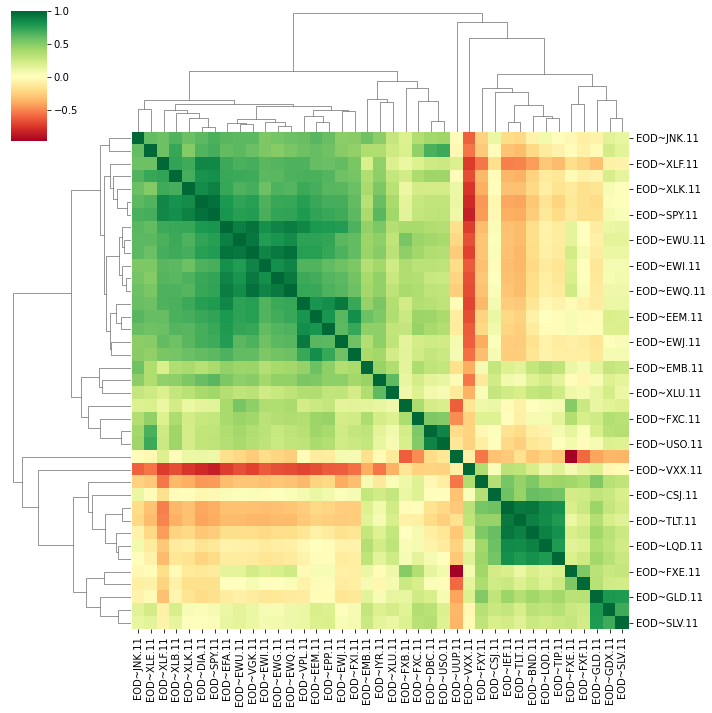

In [27]:
# visualise correlation matrix using a clustered heatmap
sns.clustermap(correlation_matrix, cmap = 'RdYlGn')
plt.show()

The heatmap is colour coded using a divergent colourscale where strong positive correlations (correlation = 1) are dark green, uncorrelated assets are yellow (correlation = 0) and negatively correlated assets are red (correlation = -1).

# Network Visualisations

Heatmaps are useful, however, they can only convey one dimension of information (the magnitude of the correlation between two assets). As an investor wanting to make a decision on which asset classes to invest in, a heatmap still does not help answer important questions such as what the annualized returns and volatility of an asset class is.

We can use network graphs to investigate the initial findings from the heatmap further and visualise them in a more accessible way which encodes more information.

<b> Create edge list

In [28]:
# convert matrix to list of edges and rename the columns
edges = correlation_matrix.stack().reset_index()
edges.columns = ['asset_1', 'asset_2', 'correlation']

# remove self correlation
edges = edges.loc[edges['asset_1'] != edges['asset_2']]

# show the first 5 rows of the edge list dataframe.
edges.head()

,asset_1,asset_2,correlation
1,EOD~BND.11,EOD~DBC.11,-0.086234
2,EOD~BND.11,EOD~DIA.11,-0.279161
3,EOD~BND.11,EOD~EEM.11,-0.069623
4,EOD~BND.11,EOD~EFA.11,-0.177521
5,EOD~BND.11,EOD~EMB.11,0.296679


<b> Create graph from edge list

Now that we have an edge list we need to feed that into the networkx library to create a graph. Note that this network is undirected as the correlation between assets is the same in both directions.

In [29]:
# create undirected graph with weights corresponding to the correlation magnitude
G0 = nx.from_pandas_edgelist(edges, 'asset_1', 'asset_2', edge_attr = ['correlation'])

# print out the graph info
print(nx.info(G0))

Name: 
Type: Graph
Number of nodes: 39
Number of edges: 741
Average degree:  38.0000


<b> Visualise the network

__Visualise the network__

To visualise the graph we have just created, we can use a number of 'out-of-the-box' layouts which can be drawn using networkx, for example:

- circular_layout - Position nodes on a circle. 
- random_layout - Position nodes uniformly at random in the unit square. 
- spring_layout - Position nodes using Fruchterman-Reingold force-directed algorithm.   

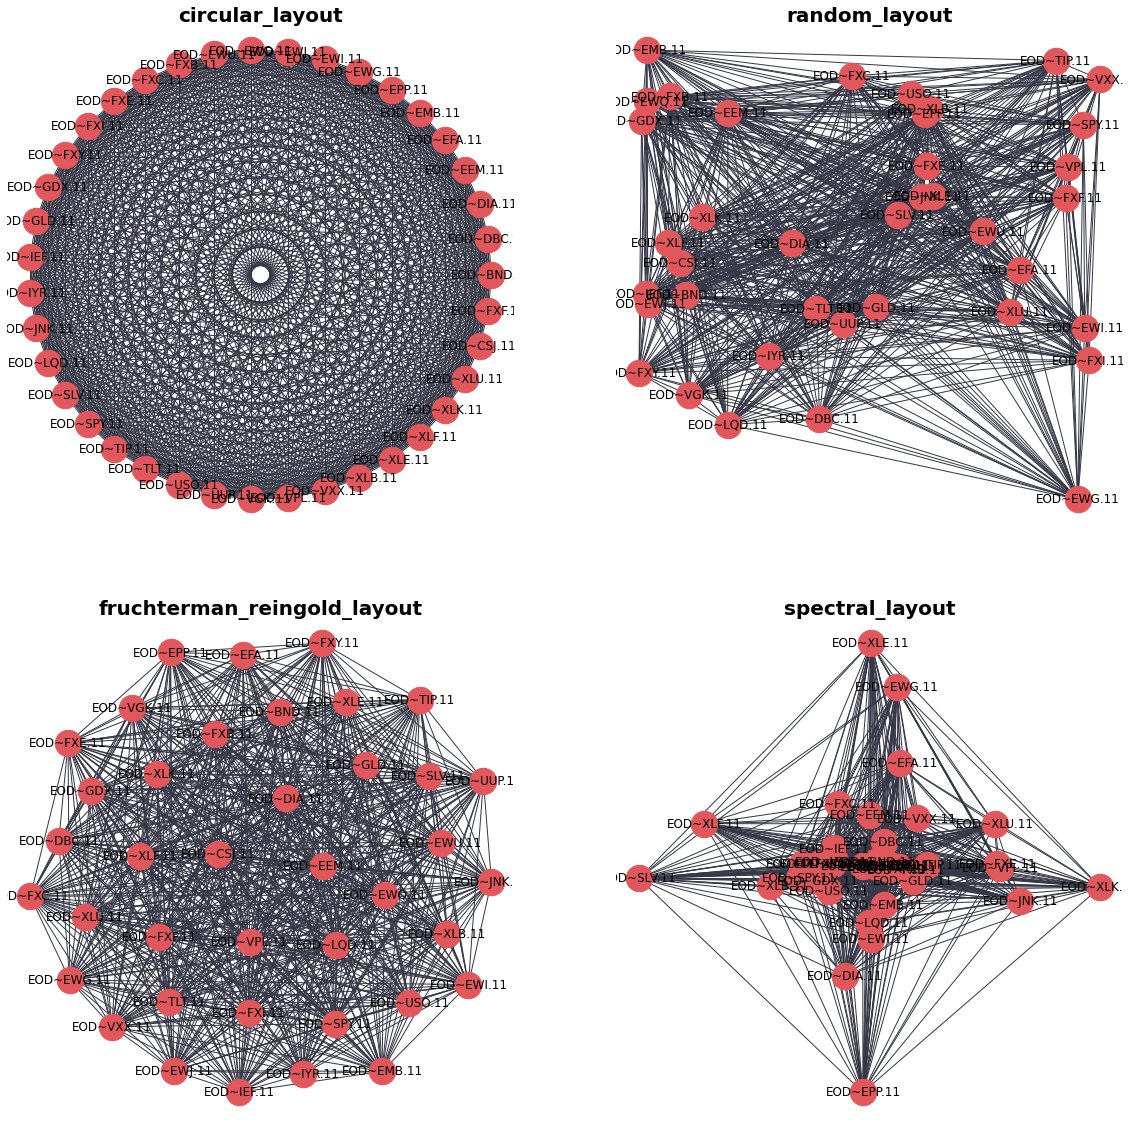

In [30]:
# create subplots
fig, axis = plt.subplots(nrows = 2, ncols = 2, figsize = (20, 20))

# save different layout functions in a list
layouts = [nx.circular_layout, nx.random_layout, nx.spring_layout, nx.spectral_layout]

# plot each different layout
for layout, ax in zip(layouts, axis.ravel()):
    nx.draw(
        G0,
        with_labels=True,
        node_size=700,
        node_color="#e1575c",
        edge_color="#363847",
        pos=layout(G0),
        ax=ax,
    )
    ax.set_title(layout.__name__, fontsize=20, fontweight="bold")

plt.show()

Whilst these visualisations may look cool, they are not very useful in their current form as all nodes have the same number of edges (links), and each edge looks the same so no useful information about the correlations between Bonds can be gained. This network visulisation can be furthur improved by reducing edges with weight less than certain threshold like 0.5, helping the graph become less clustered. 

There are also 4 different layout available for us to use.The circular layout, however, does not group the nodes in a meaningful order, it just orders the nodes in the order in which they were created, therefore it is difficult to gain insight as to which assets are most similar to each other in terms of correlations to other nodes. We can improve this with a spring based layout using the 'Fruchterman-Reingold' algorithm which sets the positions of the nodes using a cost function which minimises the distances between strongly correlated nodes. This algorithm will therefore cluster the nodes which are strongly correlated with each other allowing the viewer to quickly identify groups of assets with similar properties.

However, the best available layout for stock correlation network is the concept called minimum spanning tree derived from the area of computer science, where we can find a certain subset of created edge list where the total sum of weight can be minimised. This Minimum spanning tree, always implemented by using Kruskals Algorithm or built-in networkx function can efficiently help classify the less or non-correlated stock bonds and help to diversify the investment strategy for stackholders and reduce downside risk. 

In [31]:
# 'winner takes all' method - set minium correlation threshold to remove some
# edges from the diagram
threshold = 0.5

# create a new graph from edge list
Gx = nx.from_pandas_edgelist(edges, "asset_1", "asset_2", edge_attr=["correlation"])

# list to store edges to remove
remove = []
# loop through edges in Gx and find correlations which are below the threshold
for asset_1, asset_2 in Gx.edges():
    corr = Gx[asset_1][asset_2]["correlation"]
    # add to remove node list if abs(corr) < threshold
    if abs(corr) < threshold:
        remove.append((asset_1, asset_2))

# remove edges contained in the remove list
Gx.remove_edges_from(remove)

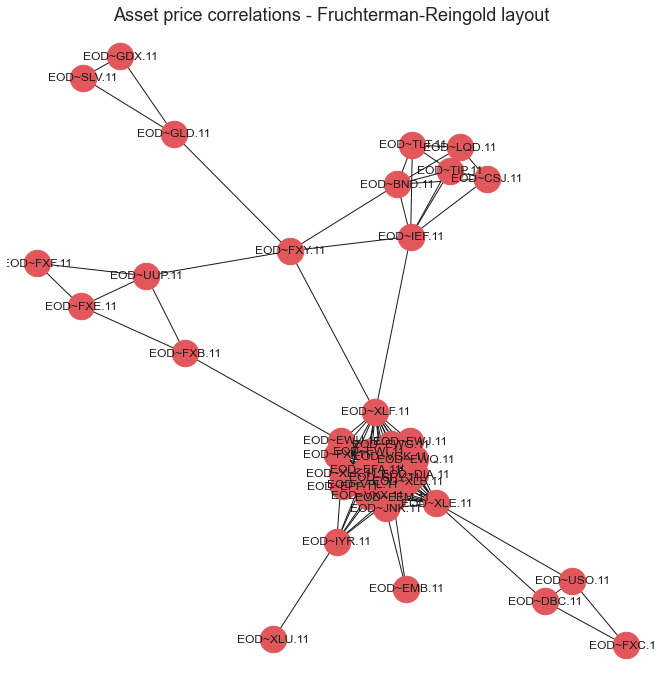

In [33]:
sns.set(rc={"figure.figsize": (9, 9)})
font_dict = {"fontsize": 18}

nx.draw(
    Gx,
    pos=nx.fruchterman_reingold_layout(Gx),
    with_labels=True,
    node_size=700,
    node_color="#e1575c"
)
plt.title("Asset price correlations - Fruchterman-Reingold layout", fontdict=font_dict)
plt.show()

After removing less correlated edges with using layout such as MST(Minimum spanning Tree), we can successfully cluster the given stock bond data into obviously 5 different clusters. To furthur enhance the visulisation effect, we can introduce weighted edge width, correlation-level based color edges, centrality based node size etc. to better describe the correlation between time-series based bond price data.